# E-commerce Shipping Data
- 제품 배송 시간에 맞춰 배송이 되었는지 예측(binary classification task)

- 주요 feature
    - ID: ID Number of Customers.
        - 고객의 ID 번호입니다.
    - Warehouse block: The Company have big - Warehouse which is divided in to block such as A,B,C,D,E.
        - 회사는 A,B,C,D,E와 같은 블록으로 구분된 큰 창고를 가지고 있습니다.
    - Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
        - 회사는 선박, 항공, 육로 등 다양한 방법으로 제품을 배송합니다.
    - Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
        - 배송조회 문의에서 걸려온 전화수입니다.
    - Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
        - 회사는 모든 고객으로부터 평가했습니다. 1이 가장 낮음(최악), 5가 가장 높음(최상)입니다.
    - Cost of the product: Cost of the Product in US Dollars.
        - 제품 비용(미국 달러).
    - Prior purchases: The Number of Prior Purchase.
        - 이전 구매 수.
    - Product importance: The company has categorized the product in the various parameter such as low, medium, high.
        - 회사는 제품을 낮음, 중간, 높음과 같은 다양한 매개변수로 분류했습니다.
    - Gender: Male and Female.
        - 남성과 여성.
    - Discount offered: Discount offered on that specific product.
        - 특정 제품에 대해 제공되는 할인.
    - Weight in gms: It is the weight in grams.
        - 무게(g)입니다.
    - **[LABEL] Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
        - 목표 변수로, 1은 제품이 정시에 도달하지 않았음을 나타내고 0은 정시에 도달했음을 나타냅니다.

---
- [reference : e-commerce shipping data in KAGGLE](https://www.kaggle.com/datasets/prachi13/customer-analytics)
- 빅분기 2회 실기 기출 데이터셋 이라고 합니다.

In [ ]:
import warnings

warnings.filterwarnings( 'ignore' )

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# #1 EDA
- 주어진 data를 EDA하고 시각화 해주세요
- 예측에 유의미한 인사이트를 서술해주세요

In [2]:
import numpy as np
import pandas as pd

path = '/content/drive/MyDrive/ADP Study/ADP25회 스터디/2. 문제 모음/5_E-commerce Shipping Data/data/'
X_train = pd.read_csv(path + 'X_train.csv')
y_train = pd.read_csv(path + 'y_train.csv')

X_test = pd.read_csv(path + 'X_test.csv')
y_test = pd.read_csv(path + '/test_label/y_test.csv')

train = pd.concat([X_train, y_train['Reached.on.Time_Y.N']], axis=1)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6598 non-null   int64 
 1   Warehouse_block      6598 non-null   object
 2   Mode_of_Shipment     6598 non-null   object
 3   Customer_care_calls  6598 non-null   object
 4   Customer_rating      6598 non-null   int64 
 5   Cost_of_the_Product  6598 non-null   int64 
 6   Prior_purchases      6598 non-null   int64 
 7   Product_importance   6598 non-null   object
 8   Gender               6598 non-null   object
 9   Discount_offered     6598 non-null   int64 
 10  Weight_in_gms        6598 non-null   int64 
 11  Reached.on.Time_Y.N  6598 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 618.7+ KB


In [4]:
train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,6045,A,Flight,4,3,266,5,high,F,5,1590,0
1,44,F,Ship,3,1,174,2,low,M,44,1556,1
2,7940,F,Road,4,1,154,10,high,M,10,5674,1
3,1596,F,Ship,4,3,158,3,medium,F,27,1207,1
4,4395,A,Flight,5,3,175,3,low,M,7,4833,1


In [ ]:
train.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,6598.000000,6598,6598,6598,6598.000000,6598.000000,6598.000000,6598,6598,6598.000000,6598.000000,6598.000000
unique,NaN,5,3,6,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,4,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,2262,4512,2115,NaN,NaN,NaN,3162,3311,NaN,NaN,NaN
mean,5476.977266,NaN,NaN,NaN,2.991361,210.393149,3.577751,NaN,NaN,13.353592,3604.191119,0.596696
...,...,...,...,...,...,...,...,...,...,...,...,...
min,1.000000,NaN,NaN,NaN,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2731.250000,NaN,NaN,NaN,2.000000,170.000000,3.000000,NaN,NaN,4.000000,1834.250000,0.000000
50%,5476.000000,NaN,NaN,NaN,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4119.500000,1.000000
75%,8187.750000,NaN,NaN,NaN,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5027.500000,1.000000


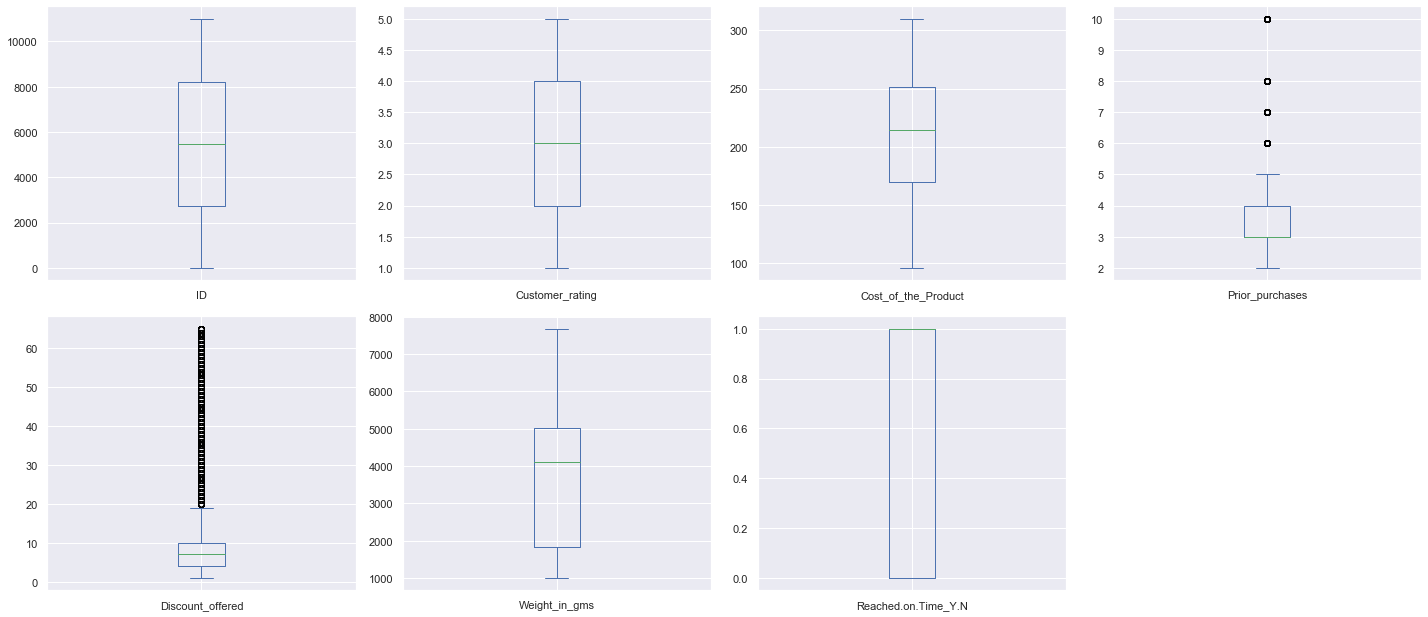

In [ ]:
import matplotlib.pyplot as plt 
train.plot(kind='box',subplots=True,layout = (7,4),figsize=(20,30))
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import display
cate_feat = []
num_feat = []
for col in train.columns:
    target = train[col]
    if target.nunique() <=20:
        print(col,target.unique())
        display(target.value_counts().to_frame())
        print()
        cate_feat.append(col)
    else:
        num_feat.append(col)
print('범주형 :', cate_feat)
print('연속형: ', num_feat)

Warehouse_block ['A' 'F' 'C' 'B' 'D']


,Warehouse_block
F,2262
B,1116
A,1090
D,1069
C,1061



Mode_of_Shipment ['Flight' 'Ship' 'Road']


,Mode_of_Shipment
Ship,4512
Flight,1066
Road,1020



Customer_care_calls ['4' '3' '5' '6' '2' '$7']


,Customer_care_calls
4,2115
3,1919
5,1403
6,604
2,404
$7,153



Customer_rating [3 1 2 5 4]


,Customer_rating
3,1367
1,1341
4,1330
5,1285
2,1275



Prior_purchases [ 5  2 10  3  4  6  7  8]


,Prior_purchases
3,2361
2,1523
4,1337
5,778
6,339
10,104
7,83
8,73



Product_importance ['high' 'low' 'medium']


,Product_importance
low,3162
medium,2866
high,570



Gender ['F' 'M']


,Gender
F,3311
M,3287



Reached.on.Time_Y.N [0 1]


,Reached.on.Time_Y.N
1,3937
0,2661



범주형 : ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
연속형:  ['ID', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']


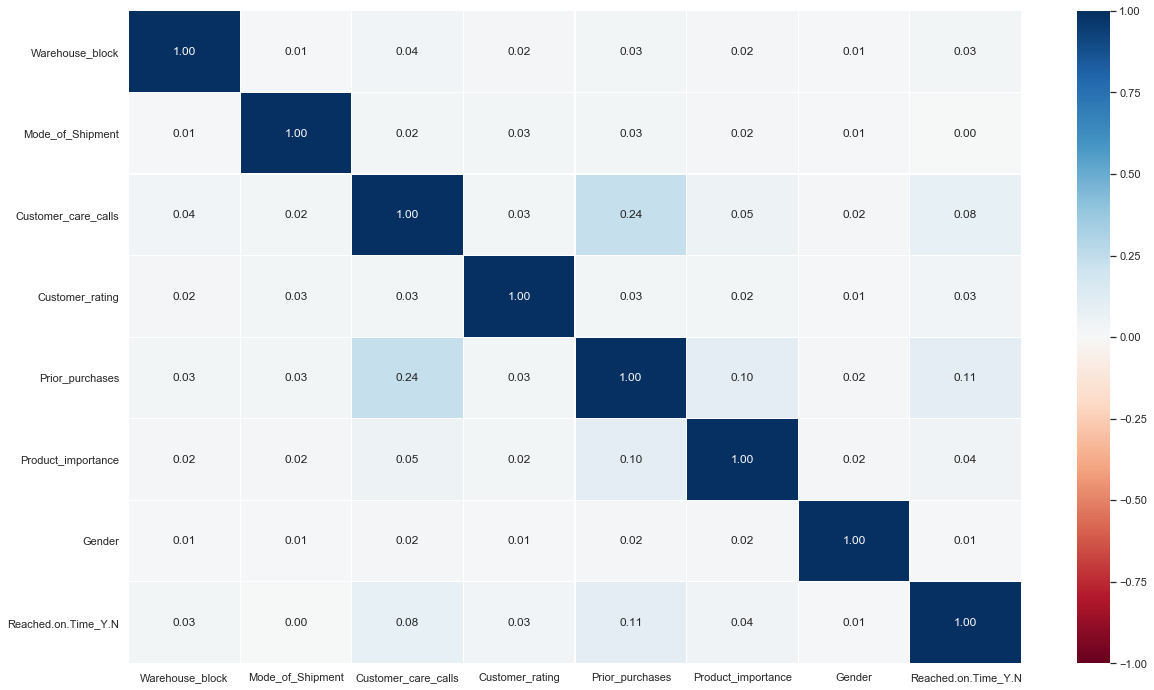

In [ ]:
from scipy.stats import chi2_contingency, chisquare

corr_list= []

for i in cate_feat:
    c_list = []
    for j in cate_feat:
        ct = pd.crosstab(train[i],train[j])
        result=chi2_contingency(observed=ct)
        c = np.sqrt(result[0]/(len(train)*(min(len(train[i].unique()),len(train[j].unique()))-1)))
        c_list.append(c)
    corr_list.append(c_list)
corr_df = pd.DataFrame(corr_list,columns=cate_feat, index=cate_feat)

sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(corr_df,vmin=-1,vmax=1,cmap='RdBu',linewidths=.1,annot=True, fmt='.2f')

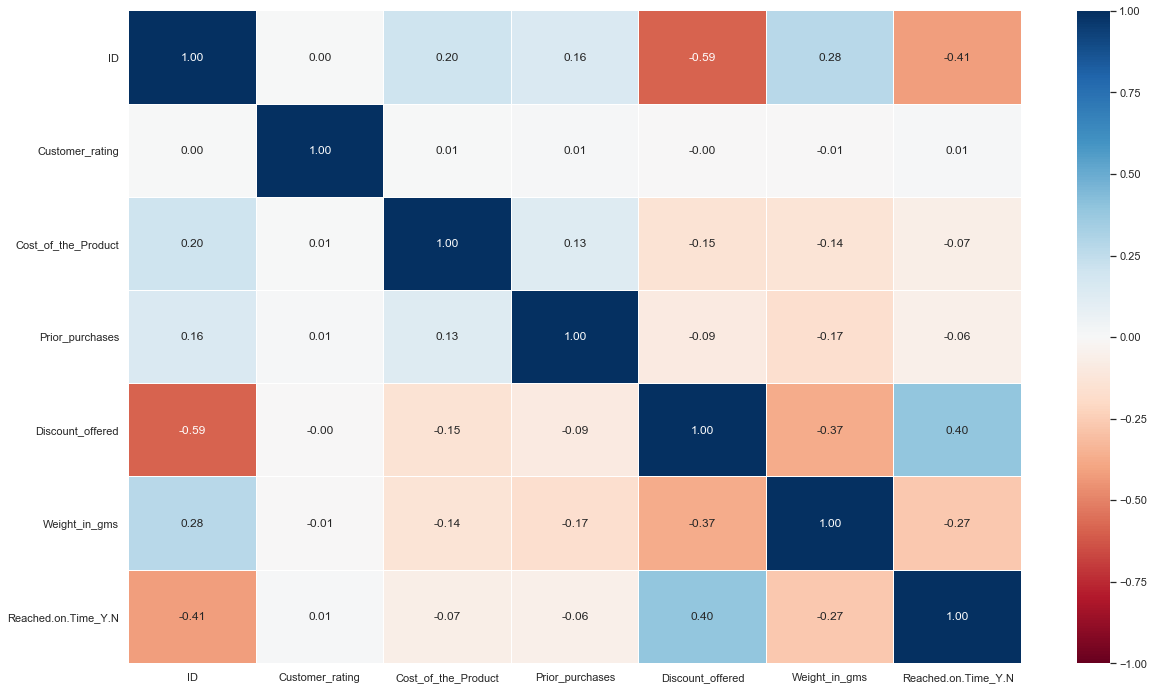

In [ ]:
numeric_feat = []
for col in train.columns:
    if train[col].dtypes == 'int64' or 'float64':
        numeric_feat.append(col)
        
num_corr = train[numeric_feat].corr(method='pearson') #spearman

sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(num_corr,vmin=-1,vmax=1,cmap='RdBu',linewidths=.1,annot=True, fmt='.2f')

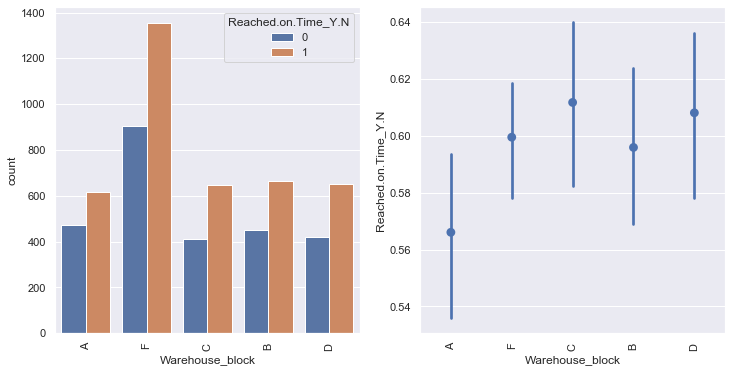

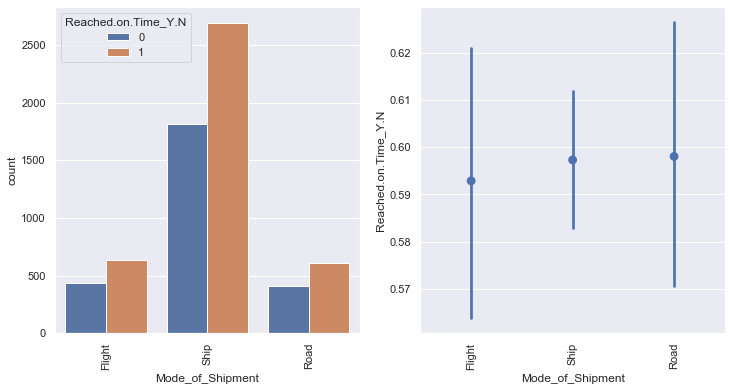

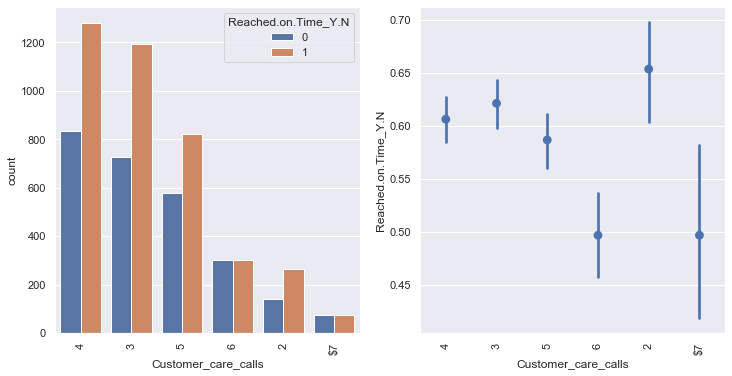

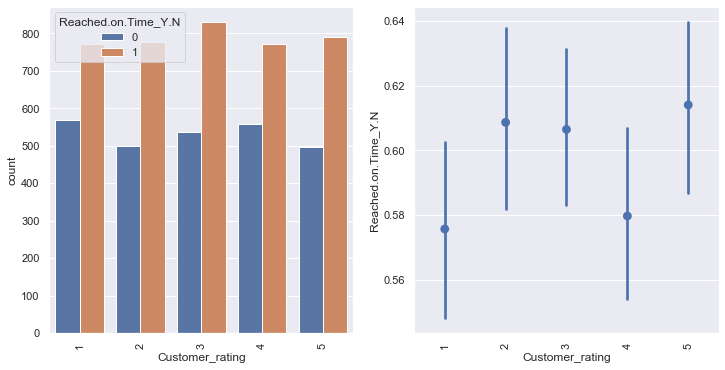

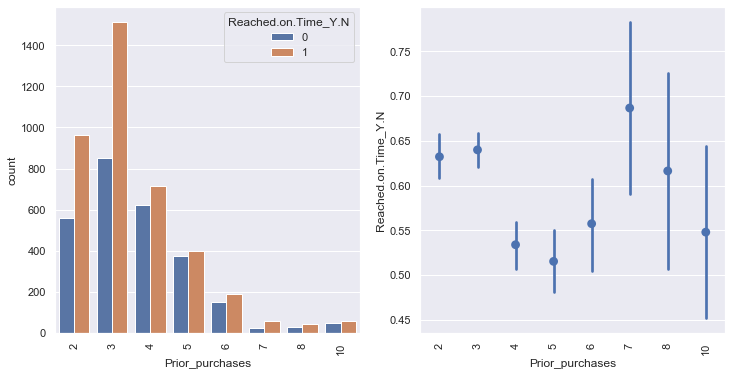

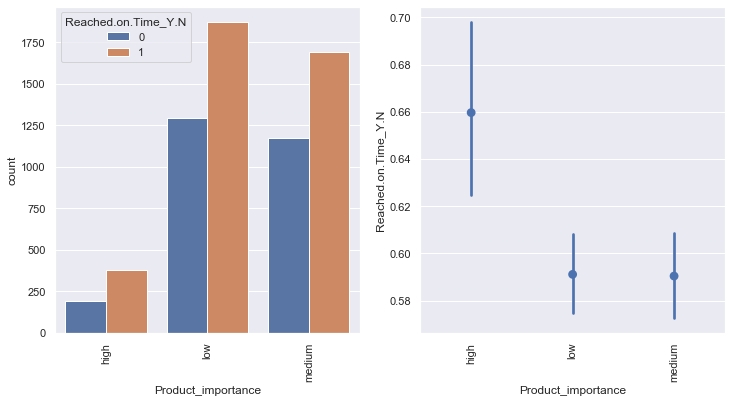

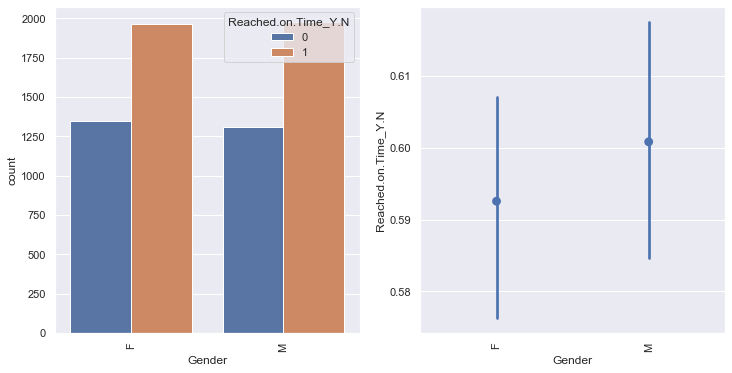

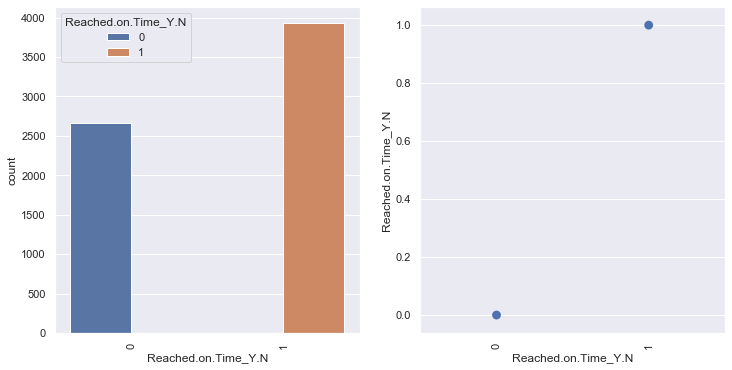

In [ ]:
import seaborn as sns

for i in cate_feat:

    f, ax = plt.subplots(1,2,figsize=(12,6))
    
    sns.countplot(x=i,hue='Reached.on.Time_Y.N',data=train, ax=ax[0])
    plt.sca(ax[0])
    plt.xticks(rotation=90)

    sns.pointplot(x=i,y='Reached.on.Time_Y.N',data=train, ax=ax[1],join=False)
    plt.sca(ax[1])
    plt.xticks(rotation=90)

    plt.show()

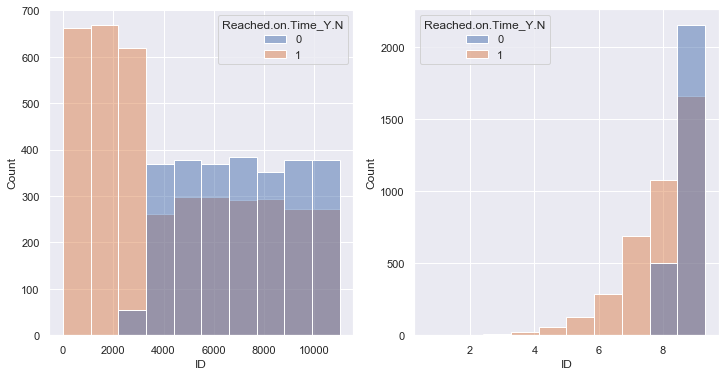

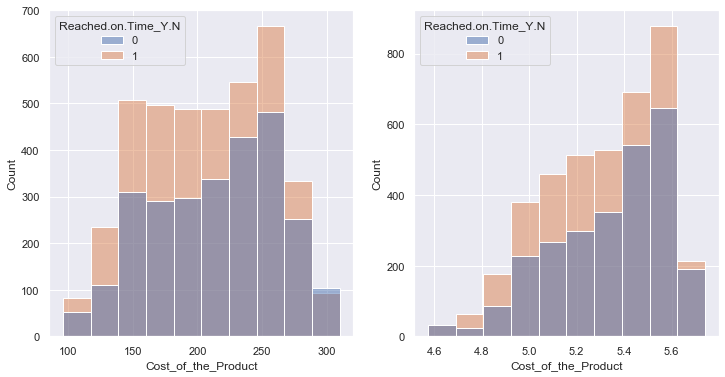

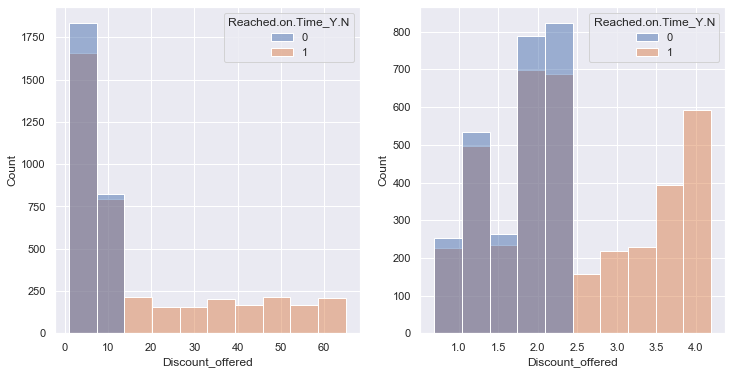

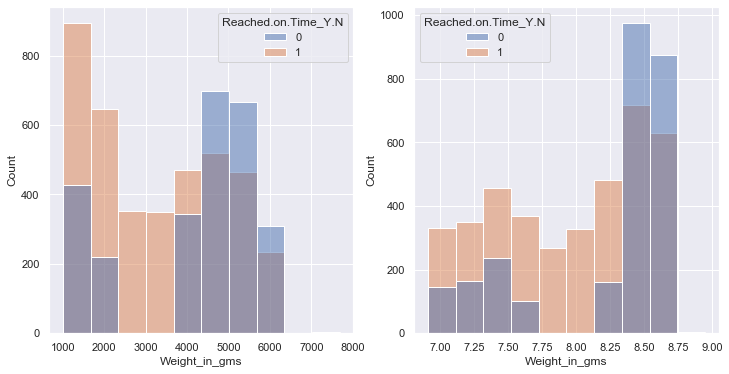

In [ ]:
import seaborn as sns

for i in num_feat:

    f, ax = plt.subplots(1,2,figsize=(12,6))
    
#     sns.countplot(x=i,hue='Reached.on.Time_Y.N',data=train, ax=ax[0])
#     plt.sca(ax[0])
#     plt.xticks(rotation=90)

#     sns.pointplot(x=i,y='Reached.on.Time_Y.N',data=train, ax=ax[1],join=False)
#     plt.sca(ax[1])
#     plt.xticks(rotation=90)
    

    sns.histplot(x=train[i],bins=10,hue=train['Reached.on.Time_Y.N'], ax=ax[0])
    
    
    sns.histplot(x=np.log1p(train[i]),bins=10,hue=train['Reached.on.Time_Y.N'], ax=ax[1])

    plt.show()

In [ ]:
train2 = train.loc[:,['Weight_in_gms','Reached.on.Time_Y.N']]

In [ ]:
train3 = train.loc[:,['Discount_offered','Reached.on.Time_Y.N']]

In [ ]:
pd.set_option('display.max_rows', 7000)

train2.sort_values('Weight_in_gms')

,Weight_in_gms,Reached.on.Time_Y.N
6356,1001,1
4798,1001,1
5729,1003,1
6114,1003,0
895,1003,0
76,1004,1
5680,1005,1
4682,1005,1
3961,1005,1
3174,1005,0


In [ ]:
pd.set_option('display.max_rows', 10)

train3.sort_values('Discount_offered')

,Discount_offered,Reached.on.Time_Y.N
6597,1,0
5722,1,1
1447,1,1
5717,1,0
1435,1,0
...,...,...
5552,65,1
4037,65,1
6555,65,1
5535,65,1


- 결측치 없음
- Warehouse_block 에서 왜 E가 아니라 F?
- customer_care_calls 에서 $7은 7이상이라는 의미인가?
- Discount_offered와 Weight_in_gms에서 0이 발견되는 구간이 정해져 있음

# #2 전처리
- 필요한 전처리를 한 후, 처리한 이유를 서술해주세요

ID 제거

1. 연속형 변수

- Cost_of_the_Product: 로그 변환

- Discount_offered : 11 이상은 타겟이 항상 1 -> 11미만과 11이상으로 나눠줌 -> 범주형

- Weight_in_gms : 2000~4000은 타겟이 항상 1 -> ~2000 / 2000~4000 / 4000~ 으로 나눠줌 -> 범주형

2. 범주형 변수

- 더미 변환



In [ ]:
def preprocessing(df):
    
    df.drop(['ID'], axis=1, inplace=True)
    
    index = df[df['Discount_offered'] >= 11].index
    df.loc[index,'Discount_offered'] = 1
    
    index = df[df['Discount_offered'] < 11].index
    df.loc[index,'Discount_offered'] = 0
    
    index = df[df['Weight_in_gms'] < 2000].index
    df.loc[index,'Weight_in_gms'] = 0
    
    index = df[(df['Weight_in_gms'] >= 2000) & (df['Weight_in_gms'] <= 4000)].index
    df.loc[index,'Weight_in_gms'] = 1
    
    index = df[df['Weight_in_gms'] > 4000].index
    df.loc[index,'Weight_in_gms'] = 2
    
    df['Cost_of_the_Product'] = np.log1p(df['Cost_of_the_Product'])
    
    return df

In [ ]:
X_train_pr = X_train.copy()
X_test_pr = X_test.copy()

preprocessing(X_train_pr)
preprocessing(X_test_pr)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Ship,5,2,5.560682,5,low,F,0,0
1,F,Ship,3,5,4.897840,3,medium,F,0,2
2,F,Road,3,4,5.257495,5,medium,F,0,2
3,D,Ship,4,2,5.402677,3,low,M,0,2
4,D,Flight,4,5,5.442418,2,low,F,0,1
...,...,...,...,...,...,...,...,...,...,...
4396,F,Flight,4,1,5.062595,3,medium,M,0,0
4397,B,Road,3,5,4.941642,2,medium,M,0,2
4398,A,Road,4,1,5.141664,10,medium,F,0,2
4399,B,Ship,3,1,5.501258,3,medium,F,0,2


In [ ]:
for i in ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']:
    dummy = pd.get_dummies(X_train_pr[i], prefix=i)
    X_train_pr = pd.concat([X_train_pr,dummy],axis=1)
    X_train_pr.drop([i], axis=1, inplace=True)
    
for i in ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']:
    dummy = pd.get_dummies(X_test_pr[i], prefix=i)
    X_test_pr = pd.concat([X_test_pr,dummy],axis=1)
    X_test_pr.drop([i], axis=1, inplace=True)

# #3 통계분석
- 아래 feature간 통계분석을 자유롭게 수행하고 결과를 서술해주세요
    - Customer rating ~ Reached on time
    - Product importance ~ Customer rating

In [ ]:
from scipy.stats import chi2_contingency, chisquare

ct = pd.crosstab(train['Customer_rating'],train['Reached.on.Time_Y.N'])
result=chi2_contingency(observed=ct)
c = np.sqrt(result[0]/(len(train)*(min(len(train[i].unique()),len(train[j].unique()))-1)))
print(c,result[1])

0.03245321516964221 0.13860331241527957


In [ ]:
from scipy.stats import chi2_contingency, chisquare

ct = pd.crosstab(train['Customer_rating'],train['Product_importance'])
result=chi2_contingency(observed=ct)
c = np.sqrt(result[0]/(len(train)*(min(len(train[i].unique()),len(train[j].unique()))-1)))
print(c,result[1])

0.03364615229406788 0.4869393161896117


# #4 모델링 및 예측
- 모델링
    - 3가지 모델을 선택해 모델링해주세요.
    - 모델을 선택한 이유를 서술해주세요
- 예측
    - 성능지표를 3가지 선택해 측정해주세요
    - 지표를 선택한 이유를 서술해주세요

In [ ]:
lr_clf.__class__.__name__

'LogisticRegression'

In [ ]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_train_pr = y_train.drop(['ID'], axis=1)
y_test_pr = y_test.drop(['ID'], axis=1)

lr_clf = LogisticRegression(random_state=156)
dt_clf = DecisionTreeClassifier(random_state=156)
rf_clf = RandomForestClassifier()


def abc(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    ac = accuracy_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    roc = roc_auc_score(pred, y_test)
    
    return print(model.__class__.__name__,"평가 : ",'Accuracy :',round(ac,3),'F1-score :',round(f1,3),'roc-auc score :', round(roc,3))


C:\Users\s7s71\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\s7s71\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-258-98ce3d197449>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train_pr, y_

로지스틱 회귀모형 예측 정확도 :  0.6489
결정트리 예측 정확도 :  0.6410
Random Forest 예측 정확도: 0.6560


In [ ]:
abc(lr_clf, X_train_pr, y_train_pr, X_test_pr, y_test_pr)
abc(dt_clf, X_train_pr, y_train_pr, X_test_pr, y_test_pr)
abc(rf_clf, X_train_pr, y_train_pr, X_test_pr, y_test_pr)

LogisticRegression 평가 :  Accuracy : 0.656 F1-score : 0.699 roc-auc score : 0.649
DecisionTreeClassifier 평가 :  Accuracy : 0.641 F1-score : 0.697 roc-auc score : 0.628
RandomForestClassifier 평가 :  Accuracy : 0.653 F1-score : 0.692 roc-auc score : 0.648


# #5 추가적인 개선 방안
을 서술해주세요

변수 하나를 제외하고 모두 범주형 변수이므로 범주형 변수에 최적화된 catboost 모델을 사용해서 분석해본다.

In [ ]:
X_train_cat = pd.read_csv('./data/X_train.csv')
y_train_cat = pd.read_csv('./data/y_train.csv')

X_test_cat = pd.read_csv('./data/X_test.csv')
y_test_cat = pd.read_csv('./data/test_label/y_test.csv')

In [ ]:
preprocessing(X_train_cat)
preprocessing(X_test_cat)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Ship,5,2,5.560682,5,low,F,0,0
1,F,Ship,3,5,4.897840,3,medium,F,0,2
2,F,Road,3,4,5.257495,5,medium,F,0,2
3,D,Ship,4,2,5.402677,3,low,M,0,2
4,D,Flight,4,5,5.442418,2,low,F,0,1
...,...,...,...,...,...,...,...,...,...,...
4396,F,Flight,4,1,5.062595,3,medium,M,0,0
4397,B,Road,3,5,4.941642,2,medium,M,0,2
4398,A,Road,4,1,5.141664,10,medium,F,0,2
4399,B,Ship,3,1,5.501258,3,medium,F,0,2


In [ ]:
cate_feat = list(X_train_cat.columns)
cate_feat.remove('Cost_of_the_Product')

In [ ]:
from catboost import CatBoostClassifier

y_train_cat_pr = y_train_cat.drop(['ID'], axis=1)
y_test_cat_pr = y_test_cat.drop(['ID'], axis=1)

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train_cat, y_train_cat_pr, cat_features=cate_feat,verbose=100)

Learning rate set to 0.023058
0:	learn: 0.6776365	total: 202ms	remaining: 3m 21s
1:	learn: 0.6638490	total: 232ms	remaining: 1m 55s
2:	learn: 0.6510886	total: 264ms	remaining: 1m 27s
3:	learn: 0.6390523	total: 292ms	remaining: 1m 12s
4:	learn: 0.6280483	total: 322ms	remaining: 1m 3s
5:	learn: 0.6189202	total: 352ms	remaining: 58.2s
6:	learn: 0.6098322	total: 382ms	remaining: 54.1s
7:	learn: 0.6018821	total: 411ms	remaining: 50.9s
8:	learn: 0.5944774	total: 446ms	remaining: 49.1s
9:	learn: 0.5881931	total: 477ms	remaining: 47.2s
10:	learn: 0.5821885	total: 508ms	remaining: 45.7s
11:	learn: 0.5766961	total: 565ms	remaining: 46.5s
12:	learn: 0.5716612	total: 586ms	remaining: 44.5s
13:	learn: 0.5666999	total: 618ms	remaining: 43.5s
14:	learn: 0.5624926	total: 654ms	remaining: 42.9s
15:	learn: 0.5591337	total: 685ms	remaining: 42.1s
16:	learn: 0.5553043	total: 730ms	remaining: 42.2s
17:	learn: 0.5519307	total: 778ms	remaining: 42.5s
18:	learn: 0.5485289	total: 825ms	remaining: 42.6s
19:	lea

162:	learn: 0.4980424	total: 5.76s	remaining: 29.6s
163:	learn: 0.4979156	total: 5.8s	remaining: 29.6s
164:	learn: 0.4977967	total: 5.84s	remaining: 29.6s
165:	learn: 0.4977891	total: 5.86s	remaining: 29.4s
166:	learn: 0.4977391	total: 5.91s	remaining: 29.5s
167:	learn: 0.4976142	total: 5.95s	remaining: 29.5s
168:	learn: 0.4975717	total: 6s	remaining: 29.5s
169:	learn: 0.4975453	total: 6.02s	remaining: 29.4s
170:	learn: 0.4974557	total: 6.06s	remaining: 29.4s
171:	learn: 0.4973736	total: 6.1s	remaining: 29.4s
172:	learn: 0.4972867	total: 6.14s	remaining: 29.3s
173:	learn: 0.4971803	total: 6.17s	remaining: 29.3s
174:	learn: 0.4971095	total: 6.21s	remaining: 29.3s
175:	learn: 0.4970195	total: 6.26s	remaining: 29.3s
176:	learn: 0.4969358	total: 6.29s	remaining: 29.3s
177:	learn: 0.4968424	total: 6.34s	remaining: 29.3s
178:	learn: 0.4967869	total: 6.38s	remaining: 29.3s
179:	learn: 0.4967826	total: 6.4s	remaining: 29.1s
180:	learn: 0.4967492	total: 6.44s	remaining: 29.1s
181:	learn: 0.4966

326:	learn: 0.4866003	total: 11.6s	remaining: 23.9s
327:	learn: 0.4865409	total: 11.7s	remaining: 23.9s
328:	learn: 0.4864214	total: 11.7s	remaining: 23.9s
329:	learn: 0.4862892	total: 11.7s	remaining: 23.8s
330:	learn: 0.4862584	total: 11.7s	remaining: 23.7s
331:	learn: 0.4862039	total: 11.8s	remaining: 23.7s
332:	learn: 0.4861640	total: 11.8s	remaining: 23.6s
333:	learn: 0.4861098	total: 11.9s	remaining: 23.6s
334:	learn: 0.4860444	total: 11.9s	remaining: 23.6s
335:	learn: 0.4858840	total: 11.9s	remaining: 23.6s
336:	learn: 0.4857741	total: 12s	remaining: 23.5s
337:	learn: 0.4857073	total: 12s	remaining: 23.5s
338:	learn: 0.4855874	total: 12s	remaining: 23.4s
339:	learn: 0.4855488	total: 12s	remaining: 23.4s
340:	learn: 0.4855133	total: 12.1s	remaining: 23.3s
341:	learn: 0.4855109	total: 12.1s	remaining: 23.3s
342:	learn: 0.4854668	total: 12.1s	remaining: 23.2s
343:	learn: 0.4854484	total: 12.2s	remaining: 23.2s
344:	learn: 0.4853886	total: 12.2s	remaining: 23.1s
345:	learn: 0.485284

487:	learn: 0.4736236	total: 17.5s	remaining: 18.3s
488:	learn: 0.4734817	total: 17.5s	remaining: 18.3s
489:	learn: 0.4734210	total: 17.5s	remaining: 18.2s
490:	learn: 0.4733452	total: 17.6s	remaining: 18.2s
491:	learn: 0.4732574	total: 17.6s	remaining: 18.2s
492:	learn: 0.4732192	total: 17.7s	remaining: 18.2s
493:	learn: 0.4731799	total: 17.7s	remaining: 18.2s
494:	learn: 0.4730815	total: 17.8s	remaining: 18.1s
495:	learn: 0.4729623	total: 17.8s	remaining: 18.1s
496:	learn: 0.4727972	total: 17.9s	remaining: 18.1s
497:	learn: 0.4727411	total: 17.9s	remaining: 18s
498:	learn: 0.4727257	total: 17.9s	remaining: 18s
499:	learn: 0.4726132	total: 18s	remaining: 18s
500:	learn: 0.4725093	total: 18s	remaining: 17.9s
501:	learn: 0.4724425	total: 18.1s	remaining: 17.9s
502:	learn: 0.4723696	total: 18.1s	remaining: 17.9s
503:	learn: 0.4723270	total: 18.2s	remaining: 17.9s
504:	learn: 0.4722225	total: 18.2s	remaining: 17.8s
505:	learn: 0.4721314	total: 18.2s	remaining: 17.8s
506:	learn: 0.4720248	

646:	learn: 0.4614406	total: 23.5s	remaining: 12.8s
647:	learn: 0.4613576	total: 23.6s	remaining: 12.8s
648:	learn: 0.4612975	total: 23.6s	remaining: 12.8s
649:	learn: 0.4612267	total: 23.6s	remaining: 12.7s
650:	learn: 0.4611661	total: 23.7s	remaining: 12.7s
651:	learn: 0.4611191	total: 23.7s	remaining: 12.6s
652:	learn: 0.4610725	total: 23.7s	remaining: 12.6s
653:	learn: 0.4610345	total: 23.8s	remaining: 12.6s
654:	learn: 0.4609668	total: 23.8s	remaining: 12.5s
655:	learn: 0.4608669	total: 23.8s	remaining: 12.5s
656:	learn: 0.4608217	total: 23.9s	remaining: 12.5s
657:	learn: 0.4608058	total: 23.9s	remaining: 12.4s
658:	learn: 0.4607496	total: 23.9s	remaining: 12.4s
659:	learn: 0.4606778	total: 24s	remaining: 12.3s
660:	learn: 0.4606222	total: 24s	remaining: 12.3s
661:	learn: 0.4604327	total: 24s	remaining: 12.3s
662:	learn: 0.4603586	total: 24.1s	remaining: 12.2s
663:	learn: 0.4602660	total: 24.1s	remaining: 12.2s
664:	learn: 0.4601999	total: 24.1s	remaining: 12.2s
665:	learn: 0.4601

806:	learn: 0.4508565	total: 28.9s	remaining: 6.91s
807:	learn: 0.4508187	total: 28.9s	remaining: 6.87s
808:	learn: 0.4507986	total: 28.9s	remaining: 6.83s
809:	learn: 0.4507901	total: 29s	remaining: 6.8s
810:	learn: 0.4507169	total: 29s	remaining: 6.76s
811:	learn: 0.4506271	total: 29s	remaining: 6.72s
812:	learn: 0.4505088	total: 29.1s	remaining: 6.69s
813:	learn: 0.4504529	total: 29.1s	remaining: 6.65s
814:	learn: 0.4503600	total: 29.1s	remaining: 6.61s
815:	learn: 0.4503408	total: 29.2s	remaining: 6.58s
816:	learn: 0.4502561	total: 29.2s	remaining: 6.54s
817:	learn: 0.4501820	total: 29.2s	remaining: 6.5s
818:	learn: 0.4500842	total: 29.3s	remaining: 6.47s
819:	learn: 0.4500093	total: 29.3s	remaining: 6.43s
820:	learn: 0.4499300	total: 29.3s	remaining: 6.39s
821:	learn: 0.4497986	total: 29.4s	remaining: 6.36s
822:	learn: 0.4497844	total: 29.4s	remaining: 6.32s
823:	learn: 0.4497635	total: 29.4s	remaining: 6.29s
824:	learn: 0.4497524	total: 29.5s	remaining: 6.25s
825:	learn: 0.449712

970:	learn: 0.4397580	total: 34.2s	remaining: 1.02s
971:	learn: 0.4395392	total: 34.3s	remaining: 987ms
972:	learn: 0.4394647	total: 34.3s	remaining: 952ms
973:	learn: 0.4393948	total: 34.3s	remaining: 916ms
974:	learn: 0.4393286	total: 34.4s	remaining: 881ms
975:	learn: 0.4392322	total: 34.4s	remaining: 846ms
976:	learn: 0.4392080	total: 34.4s	remaining: 811ms
977:	learn: 0.4391779	total: 34.5s	remaining: 776ms
978:	learn: 0.4390962	total: 34.5s	remaining: 740ms
979:	learn: 0.4390199	total: 34.5s	remaining: 705ms
980:	learn: 0.4389810	total: 34.6s	remaining: 670ms
981:	learn: 0.4389247	total: 34.6s	remaining: 634ms
982:	learn: 0.4388624	total: 34.7s	remaining: 599ms
983:	learn: 0.4388438	total: 34.7s	remaining: 564ms
984:	learn: 0.4387497	total: 34.7s	remaining: 529ms
985:	learn: 0.4387221	total: 34.8s	remaining: 493ms
986:	learn: 0.4386017	total: 34.8s	remaining: 458ms
987:	learn: 0.4384916	total: 34.8s	remaining: 423ms
988:	learn: 0.4383911	total: 34.8s	remaining: 388ms
989:	learn: 

In [ ]:
pred = cb_clf.predict(X_test_cat)
ac = accuracy_score(pred, y_test_cat_pr)
f1 = f1_score(pred, y_test_cat_pr)
roc = roc_auc_score(pred, y_test_cat_pr)

print("평가 : ",'Accuracy :',round(ac,3),'F1-score :',round(f1,3),'roc-auc score :', round(roc,3))

평가 :  Accuracy : 0.675 F1-score : 0.669 roc-auc score : 0.709
